<a href="https://colab.research.google.com/github/defesagit/ProyectoBanco/blob/main/ProyectoBancoML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1) Descripcón del Problema**

Las amenazas financieras están mostrando una tendencia sobre el riesgo crediticio de los bancos comerciales a medida que ha surgido la increíble mejora en la industria financiera. De esta forma, una de las mayores amenazas a las que se enfrentan los bancos comerciales es la predicción del riesgo de los clientes de crédito.

Los estudios recientes se centran principalmente en mejorar el rendimiento del clasificador para la predicción de incumplimiento de tarjetas

# **2)Depuración de Datos**



## **2.1 Librerias**

In [51]:
import numpy as np # para calculo matricial y matematicas
import pandas as pd #para depurar datos
#!


## **2.2 Importar Datos**

In [52]:
url="https://raw.githubusercontent.com/defesagit/ProyectoBanco/main/UCI_Credit_Card%20(1).csv"

In [53]:
df=pd.read_csv(url)

In [54]:
#Encabezado
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


## **2.3 Dimensiòn**

In [55]:
print(df.shape)

(30000, 25)


## **2.4 Diccionario de Variables**

ID : ID de cada cliente
Monto_Credito : cantidad del crédito otorgado en dólares NT (incluye crédito individual y familiar / suplementario
SEXO : Género (1 = masculino, 2 = femenino)
EDUCACIÓN : (1 = posgrado, 2 = universidad, 3 = bachillerato, 4 = otros, 5 = desconocido, 6 = desconocido)
MATRIMONIO : Estado civil (1 = casado, 2 = soltero, 3 = otros)
EDAD : Edad en años
PAY_0 : Estado de reembolso en septiembre de 2005 (-1 = pago debidamente, 1 = retraso en el pago durante un mes, 2 = retraso en el pago durante dos meses,… 8 = retraso en el pago durante ocho meses, 9 = retraso en el pago durante nueve meses o más)
PAY_2 : Estado de reembolso en agosto de 2005 (escala igual a la anterior)
PAY_3 : Estado de reembolso en julio de 2005 (escala igual a la anterior)
PAY_4 : Estado de reembolso en junio de 2005 (escala igual a la anterior)
PAY_5 : Estado de reembolso en mayo de 2005 (escala igual a la anterior)
PAY_6 : Estado de reembolso en abril de 2005 (escala igual a la anterior)
BILL_AMT1 : Monto del extracto de la factura en septiembre de 2005 (dólar NT)
BILL_AMT2 : Monto del extracto de la factura en agosto de 2005 (dólar NT)
BILL_AMT3 : Monto del extracto de la factura en julio de 2005 (dólar NT)
BILL_AMT4 : Monto del extracto de la factura en junio de 2005 (dólar NT)
BILL_AMT5 : Monto del extracto de la factura en mayo de 2005 (dólar NT)
BILL_AMT6 : Monto del extracto de la factura en abril de 2005 (dólar NT)
PAY_AMT1 : Monto del pago anterior en septiembre de 2005 (dólar NT)
PAY_AMT2 : Monto del pago anterior en agosto de 2005 (dólar NT)
PAY_AMT3 : Monto del pago anterior en julio de 2005 (dólar NT)
PAY_AMT4 : Monto del pago anterior en junio de 2005 (dólar NT)
PAY_AMT5 : Monto del pago anterior en mayo de 2005 (dólar NT)
PAY_AMT6 : Monto del pago anterior en abril de 2005 (dólar NT)
default.payment.next.month : pago predeterminado (1 = sí, 0 = no)

In [56]:
print(df.columns.to_list())

['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'default.payment.next.month']


## **2.5 Recodificación de las variables**

In [57]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          30000 non-null  int64  
 1   LIMIT_BAL                   30000 non-null  float64
 2   SEX                         30000 non-null  int64  
 3   EDUCATION                   30000 non-null  int64  
 4   MARRIAGE                    30000 non-null  int64  
 5   AGE                         30000 non-null  int64  
 6   PAY_0                       30000 non-null  int64  
 7   PAY_2                       30000 non-null  int64  
 8   PAY_3                       30000 non-null  int64  
 9   PAY_4                       30000 non-null  int64  
 10  PAY_5                       30000 non-null  int64  
 11  PAY_6                       30000 non-null  int64  
 12  BILL_AMT1                   30000 non-null  float64
 13  BILL_AMT2                   300

In [58]:
##Id debe ser tipo string
df.ID=df.ID.astype(str)

In [59]:
# Validar Variable Sex
df.SEX.value_counts()

2    18112
1    11888
Name: SEX, dtype: int64

In [60]:
## Sex debe ser Categorica
df.SEX=df.SEX.astype("category")

In [61]:
## Validar Educación
#Educación: ()
df.EDUCATION.value_counts()

2    14030
1    10585
3     4917
5      280
4      123
6       51
0       14
Name: EDUCATION, dtype: int64

In [62]:
df.EDUCATION[df.EDUCATION==6]=5

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [63]:
df.EDUCATION[df.EDUCATION==0]=np.nan

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [64]:
#df.isnull().sum()
#Definir Educaciòn como categorica
df.EDUCATION=df.EDUCATION.astype("category")

In [65]:
## Vali Estado Civil
# Estado (1=casado, 2= soltero, 3=Otros)
df.MARRIAGE[df.MARRIAGE==0]=np.nan

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [66]:
##convertir estado civil en categorica
df.MARRIAGE=df.MARRIAGE.astype("category")

In [67]:
##Valid
df[["PAY_0","PAY_2","PAY_3","PAY_4","PAY_5","PAY_6"]]=df[["PAY_0","PAY_2","PAY_3","PAY_4","PAY_5","PAY_6"]].astype("category")

In [68]:
##default.paument.next.mont
df["default.payment.next.month"].value_counts()

0    23364
1     6636
Name: default.payment.next.month, dtype: int64

In [69]:
df["default.payment.next.month"].value_counts()/len(df)

0    0.7788
1    0.2212
Name: default.payment.next.month, dtype: float64

In [70]:
##cambiar el nombre
df.rename(columns={"default.payment.next.month":"Mora"},inplace=True)

In [71]:
## Convertir Mora en Categorica
df.Mora=df.Mora.astype("category")

##**2.6 Tratamiento de valores nulos**

In [83]:
df.isnull().sum()

ID            0
LIMIT_BAL     0
SEX           0
EDUCATION    14
MARRIAGE     54
AGE           0
PAY_0         0
PAY_2         0
PAY_3         0
PAY_4         0
PAY_5         0
PAY_6         0
BILL_AMT1     0
BILL_AMT2     0
BILL_AMT3     0
BILL_AMT4     0
BILL_AMT5     0
BILL_AMT6     0
PAY_AMT1      0
PAY_AMT2      0
PAY_AMT3      0
PAY_AMT4      0
PAY_AMT5      0
PAY_AMT6      0
Mora          0
dtype: int64

In [73]:
df.isnull().sum()/len(df)

ID           0.000000
LIMIT_BAL    0.000000
SEX          0.000000
EDUCATION    0.000467
MARRIAGE     0.001800
AGE          0.000000
PAY_0        0.000000
PAY_2        0.000000
PAY_3        0.000000
PAY_4        0.000000
PAY_5        0.000000
PAY_6        0.000000
BILL_AMT1    0.000000
BILL_AMT2    0.000000
BILL_AMT3    0.000000
BILL_AMT4    0.000000
BILL_AMT5    0.000000
BILL_AMT6    0.000000
PAY_AMT1     0.000000
PAY_AMT2     0.000000
PAY_AMT3     0.000000
PAY_AMT4     0.000000
PAY_AMT5     0.000000
PAY_AMT6     0.000000
Mora         0.000000
dtype: float64

* Variables tipo Factor se imputan por Moda
* Variables numericas, por promedio si son normales, de lo contrario por la Mediana

In [74]:
from scipy import stats

In [75]:
#! pip install scipy

In [76]:
moda_EDUCATION=stats.mode(df.EDUCATION)
print(moda_EDUCATION)

ModeResult(mode=array([2.]), count=array([14030]))


In [77]:
print(moda_EDUCATION[0][0])

2.0


In [78]:
df.EDUCATION=df.EDUCATION.replace(np.nan,moda_EDUCATION[0][0])

In [80]:
df.EDUCATION=df.EDUCATION.astype("category")

In [81]:
moda_Civil=stats.mode(df.MARRIAGE)
print(moda_Civil)

ModeResult(mode=array([2.]), count=array([15964]))


In [82]:
df.MARRIAGE=df.MARRIAGE.replace(np.nan,moda_Civil[0][0])
df.MARRIAGE=df.MARRIAGE.astype("category")

## **2.7 Conteo de Variables**

In [84]:
VariablesNumericas=df._get_numeric_data().columns.to_list()
print(VariablesNumericas)

['LIMIT_BAL', 'AGE', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']


In [85]:
len(VariablesNumericas)

14

In [88]:
##Variables Categoricas
VariablesCategoricas=df.select_dtypes(include=["category"]).columns.to_list()
print(VariablesCategoricas)
print(len(VariablesCategoricas))

['SEX', 'EDUCATION', 'MARRIAGE', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'Mora']
10


In [90]:
##Variables tipo texto
VariablesTexto=df.select_dtypes(include=["object"]).columns.to_list()
print(VariablesTexto)

['ID']


#**3) Analisis Exploratorio y Descriptivo de los Datos**

## **3.1 Analisis Univariado Tipo Numérico**

In [91]:
MontoCredito=df.LIMIT_BAL

## **3.1.1 Normalidad**

In [92]:
import matplotlib.pyplot as plt

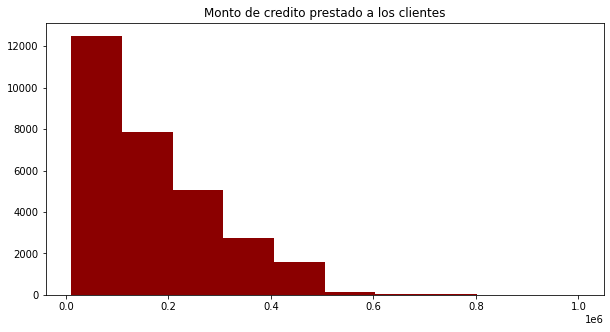

In [93]:
## Histograma
plt.figure(figsize=(10,5))
plt.hist(MontoCredito,facecolor="darkred")
plt.title("Monto de credito prestado a los clientes")
plt.show()
MontoCredito=df.LIMIT_BAL


In [94]:
PromedioInicial=np.mean(MontoCredito)
print(PromedioInicial)

167484.32266666667


#**Verificar normalidad**

Gráfico Q-Q Los gráficos de cuantiles teóricos (Gráficos Q-Q). Estos gráficos comparan los cuantiles de la distribución observada con los cuantiles teóricos de una distribución normal con la misma media y desviación estándar que los datos. Cuanto más se aproximen los datos a una normal, más alineados están los puntos entorno a la recta.

In [95]:
import statsmodels.api as sm

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


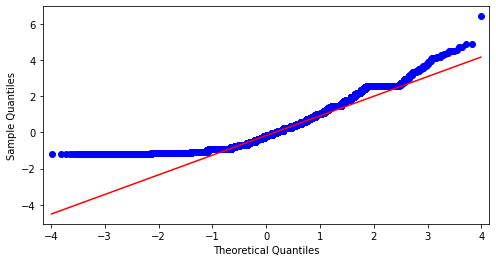

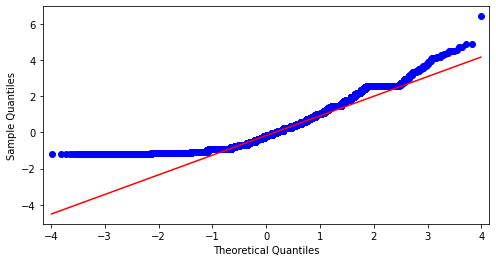

In [99]:
fig, ax=plt.subplots(figsize=(8,4))
sm.qqplot(MontoCredito,fit=True,line="q",ax=ax)

**Métodos Analíticos**